nSamples: (19200, 2)
[146.25 146.25 150.25 ...   0.     0.     0.  ]


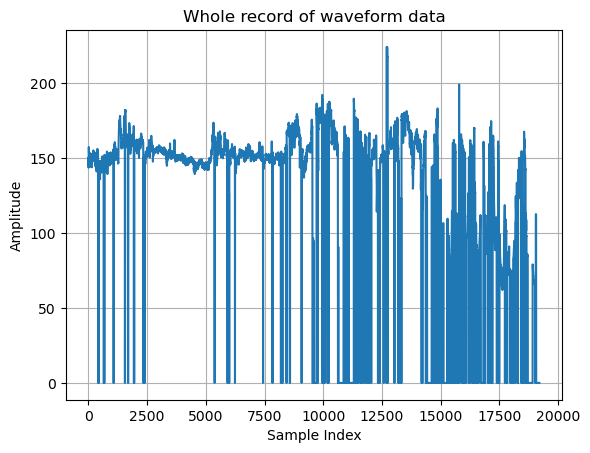

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install wfdb
import wfdb

FILEPATH = 'ctu-chb/1002'

signals, fields = wfdb.rdsamp(FILEPATH)

print('nSamples: {}'.format(signals.shape))

# transpose the matrix as originally it was vertical
signals = np.transpose(signals)

print(signals[0])

fetal_hr = signals[0]

# Calculate the number of samples corresponding to one minute
Fs = 1000  # Sampling frequency (adjust this according to your data)
duration_seconds = 60  # One minute
num_samples_one_minute = int(Fs * duration_seconds)

# Plot the first one minute of waveform data
plt.plot(fetal_hr[:num_samples_one_minute])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Whole record of waveform data')
plt.grid(True)
plt.show()
